In [43]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
import warnings
warnings.filterwarnings("ignore")
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import mlflow
from pycaret.classification import *
from pycaret.datasets import get_data

Uso dos datasets distintos para train y para test.

In [28]:
def Modelos(X_train,X_test,y_train,y_test):

    tree=DecisionTreeClassifier(criterion='gini',min_samples_split=20,random_state=99)
    tree.fit(X_train,y_train)

    predictions=tree.predict(X_test)
    print("Decision Tree")
    print("Acc:",accuracy_score(y_test,predictions))  
    print("Recall:",recall_score(y_test, predictions, average='weighted'))
    print("f1 score:",f1_score(y_test, predictions, average='weighted'))
    #print("Matriz de confusion:",confusion_matrix(y_test,predictions,labels=[0,1]))
    plot_confusion_matrix(tree,X_test,y_test,display_labels=['No falla', 'Falla'],cmap='Blues')
    print("Random Forest")
    forest=RandomForestClassifier()
    forest.fit(X_train,y_train)
    y_pred_test = forest.predict(X_test)
    plot_confusion_matrix(forest,X_test,y_test,display_labels=['No falla', 'Falla'],cmap='Blues')
    print("Acc:",accuracy_score(y_test,y_pred_test))
    print("Recall:",recall_score(y_test,y_pred_test, average='weighted'))
    print("f1 score:",f1_score(y_test, y_pred_test, average='weighted'))

In [49]:
df = pd.read_csv('datasetTRAIN.csv')
df_test=pd.read_csv('datasetTEST.csv')

In [50]:
df_test.rename(columns={'y0':'y2'},
               inplace=True)

In [51]:
def split_df(df):
    features=df.iloc[:,:-1]
    target=df.iloc[:,-1]
    return features,target

In [52]:
X_train,y_train=split_df(df)
X_test,y_test=split_df(df_test)

<AxesSubplot:ylabel='y2'>

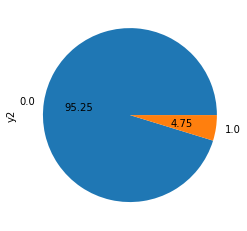

In [53]:
y_train.value_counts().plot.pie(autopct='%.2f')

Decision Tree
Acc: 0.8202247191011236
Recall: 0.8202247191011236
f1 score: 0.8281443210277405
Random Forest
Acc: 0.8355464759959143
Recall: 0.8355464759959143
f1 score: 0.8426668248905377


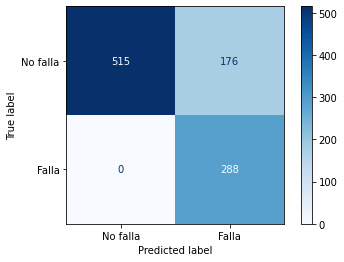

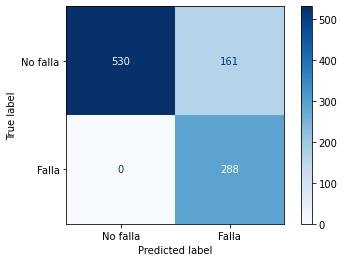

In [54]:
Modelos(X_train, X_test, y_train, y_test)

Uso 'balanced' para ver si mejora algo

In [55]:

def Modelos(X_train,X_test,y_train,y_test):

    tree=DecisionTreeClassifier(class_weight='balanced',criterion='gini',min_samples_split=20,random_state=99)
    tree.fit(X_train,y_train)

    predictions=tree.predict(X_test)
    print("Decision Tree")
    print("Acc:",accuracy_score(y_test,predictions))  
    print("Recall:",recall_score(y_test, predictions, average='weighted'))
    print("f1 score:",f1_score(y_test, predictions, average='weighted'))
    #print("Matriz de confusion:",confusion_matrix(y_test,predictions,labels=[0,1]))
    plot_confusion_matrix(tree,X_test,y_test,display_labels=['No falla', 'Falla'],cmap='Blues')
    print("Random Forest")
    forest=RandomForestClassifier()
    forest.fit(X_train,y_train)
    y_pred_test = forest.predict(X_test)
    plot_confusion_matrix(forest,X_test,y_test,display_labels=['No falla', 'Falla'],cmap='Blues')
    print("Acc:",accuracy_score(y_test,y_pred_test))
    print("Recall:",recall_score(y_test,y_pred_test, average='weighted'))
    print("f1 score:",f1_score(y_test, y_pred_test, average='weighted'))

Decision Tree
Acc: 0.8375893769152196
Recall: 0.8375893769152196
f1 score: 0.8445750640102224
Random Forest
Acc: 0.8345250255362615
Recall: 0.8345250255362615
f1 score: 0.8417004597548111


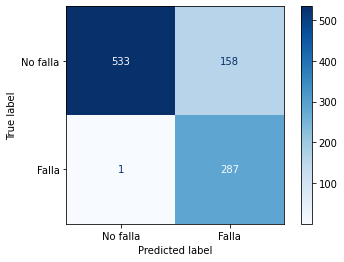

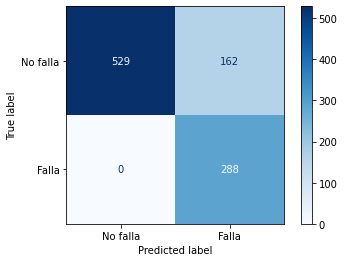

In [56]:
Modelos(X_train, X_test, y_train, y_test)

Uso solo dataset Train para predicciones

In [30]:
x_=df.iloc[:,:-1]
y_=df.iloc[:,-1]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.2, random_state=10)

Decision Tree
Acc: 0.997626582278481
Recall: 0.997626582278481
f1 score: 0.9976577722554034
Random Forest
Acc: 0.9936708860759493
Recall: 0.9936708860759493
f1 score: 0.9937807258754586


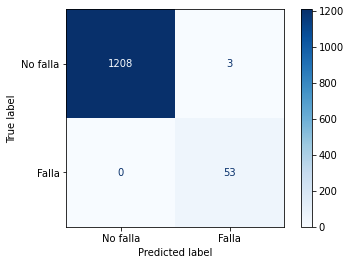

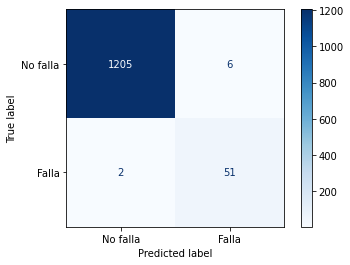

In [32]:
Modelos(X_train, X_test, y_train, y_test)

In [61]:
def Models_2(X_train,X_test,y_train,y_test):
    #Build SRF model
    SRF = RandomForestClassifier(n_estimators=150, random_state=0)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate SRF model
    scores = cross_validate(SRF, X_train, y_train, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))
    SRF.fit(X_train, y_train)
    #SRF prediction result
    y_pred = SRF.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(SRF, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('Standard Random Forest Confusion Matrix')
    plt.show()


Mean f1: 0.943
Mean recall: 0.940
Mean precision: 0.949


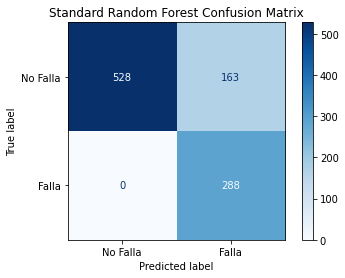

In [62]:
Models_2(X_train, X_test, y_train, y_test)

In [59]:
def Balanced(X_train,X_test,y_train,y_test):
        #Build SRF model
    BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate BRFC model
    scores = cross_validate(BRFC, X_train, y_train, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))

    #Train BRFC
    BRFC.fit(X_train, y_train)
    #BRFC prediction result
    y_pred = BRFC.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(BRFC, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('Balanced Random Forest Confusion Matrix')
    plt.show()

Mean f1: 0.919
Mean recall: 1.000
Mean precision: 0.851


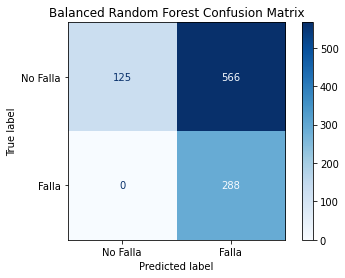

In [60]:
Balanced(X_train, X_test, y_train, y_test)

In [57]:
def overs(x_,y_):
        #Use SMOTE to oversample the minority class
    oversample = SMOTE()
    over_X, over_y = oversample.fit_resample(x_, y_)
    over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
    #Build SMOTE SRF model
    SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)
    #Create Stratified K-fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scoring = ('f1', 'recall', 'precision')
    #Evaluate SMOTE SRF model
    scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
    #Get average evaluation metrics
    print('Mean f1: %.3f' % mean(scores['test_f1']))
    print('Mean recall: %.3f' % mean(scores['test_recall']))
    print('Mean precision: %.3f' % mean(scores['test_precision']))

    #Randomly spilt dataset to test and train set
    X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.1, stratify=y_)
    #Train SMOTE SRF
    SMOTE_SRF.fit(over_X_train, over_y_train)
    #SMOTE SRF prediction result
    y_pred = SMOTE_SRF.predict(X_test)
    #Create confusion matrix
    fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['No Falla', 'Falla'], cmap='Blues')
    plt.title('SMOTE + Standard Random Forest Confusion Matrix')
    plt.show()

Mean f1: 0.996
Mean recall: 1.000
Mean precision: 0.991


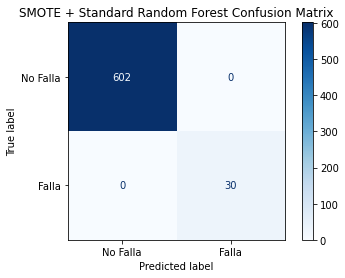

In [58]:
overs(x_,y_)

In [ ]:
clf1 = setup(df, target = 'y2' )

In [ ]:
best=compare_models()